In [10]:

import numpy as np

import math

import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import norm

tyear=3.15551e+07
au=1.5e11
msun=2e30
mearth=5.97e24
grav=6.67e-11

from astropy.io import ascii

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style('ticks')
sns.set_context("talk", rc={"lines.linewidth": 2})

import os
working_dir         = os.getcwd()


In [11]:
import pandas as pd
ddd = pd.read_csv(working_dir + '/WD_master_jan_17.csv', sep=',', header=0)
# manually updated from Andy's spreadsheet to include PG 0843 and PG10151
ddd

,Name,RA,DEC,Gaia DR2 Number,Reference (abundances),Teff,Type,Number of elements,log(Ca/Hx),error log(Ca/Hx),...,Category,> X elements (no source filter),> X elements,Include?,Fragment Core Number Fraction Lower Error,Fragment Core Number Fraction Upper Error,Parent Core Number Fraction,Core-rich?,Mantle-rich?,Crust-rich?
0,G166-58,NaN,NaN,Gaia DR2 1281989124439286912,Xu 2019,7390,H,4,-9.33,0.080000,...,No evidence of differentiation,False,False,False,NaN,NaN,NaN,False,False,False
1,G241-6,22 23 33.50,68 37 28.09,Gaia DR2 2225982838287401984,Jura 2012,15300,He,8,-7.3,0.200000,...,No evidence of differentiation,True,True,True,NaN,NaN,NaN,False,False,False
2,G29-38,23 28 47.22,05 14 50.10,Gaia DR2 2660358032257156736,Xu 2014,11800,H,8,-6.58,0.120000,...,No evidence of differentiation,True,True,True,NaN,NaN,NaN,False,False,False
3,GaiaJ0347+1624,NaN,NaN,Gaia DR2 43629828277884160,NaN,21800,H,3,-5.69278523,0.200000,...,NaN,False,False,False,NaN,NaN,NaN,False,False,False
4,GaiaJ0510+2315,NaN,NaN,Gaia DR2 3415788525598117248,Laura,21700,H,4,-6.3148,0.100000,...,NaN,False,False,False,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,GaiaJ0644-0352Spec,NaN,NaN,Gaia DR2 3105360521513256832,Laura,18350,He,8,-6.739755886,0.175299,...,NaN,True,False,False,NaN,NaN,NaN,False,False,False
294,WD0611-6931Spec,NaN,NaN,Gaia DR2 5279484614703730944,Laura,17750,H,3,-6.185814805,0.100000,...,NaN,False,False,False,NaN,NaN,NaN,False,False,False
295,SDSSJ0956+5912,NaN,NaN,Gaia DR2 1049598202217308160,Hollands 2021b,8100,He,8,-7.3,0.050000,...,NaN,True,False,False,NaN,NaN,NaN,False,False,False
296,SDSSJ1038-0036,NaN,NaN,Gaia DR2 3806714593452089856,Hollands 2021b,7560,He,7,-7.6,0.050000,...,NaN,True,False,False,NaN,NaN,NaN,False,False,False


In [12]:

teff=ddd.Teff
cat=ddd.Category
list(ddd.columns)
ca=ddd['log(Ca/Hx)']


fe=ddd['log(Fe/Hx)']
ca_error=ddd['error log(Ca/Hx)']
fe_error=ddd['error log(Fe/Hx)']


other_el=0
if other_el:

    mg=ddd['log(Mg/Hx)']
    print('Mg', mg[0:10])
    cr=ddd['log(Cr/Hx)']

    ni=ddd['log(Ni/Hx)']



    mg_error=ddd['error log(Mg/Hx)']
    cr_error=ddd['error log(Cr/Hx)']

    ni_error=ddd['error log(Ni/Hx)']

core_number_fraction=ddd['Fragment Core Number Fraction']  


diff_sigma=ddd['Differentiation sigma significance']
core_mass_fraction = core_number_fraction
ref=ddd['Reference (abundances)']
name=ddd['Name']


In [13]:

subsample=ddd[diff_sigma>3]


table_print=subsample[[ 'Name', 'Gaia DR2 Number', 'Reference (abundances)','Teff', 'Type', 'Number of elements', 'log(Ca/Hx)', 'error log(Ca/Hx)','log(Fe/Hx)', 'error log(Fe/Hx)', 'Fragment Core Number Fraction','Differentiation sigma significance' ]].copy()

print(table_print.to_latex(index=False, float_format="{:0.2f}".format ))  

\begin{tabular}{lllrlrlrlrrr}
\toprule
           Name &               Gaia DR2 Number &                             Reference (abundances) &   Teff & Type &  Number of elements & log(Ca/Hx) &  error log(Ca/Hx) & log(Fe/Hx) &  error log(Fe/Hx) &  Fragment Core Number Fraction &  Differentiation sigma significance \\
\midrule
 GALEX1931+0117 &  Gaia DR2 4287654959563143168 &                                         Melis 2011 &  21457 &    H &                   6 &      -5.83 &              0.10 &       -4.1 &              0.10 &                           0.31 &                                4.95 \\
    HE0106-3253 &  Gaia DR2 5026963661794939520 &                                            Xu 2019 &  17350 &    H &                   4 &      -5.93 &              0.11 &       -4.7 &              0.06 &                           0.60 &                                9.22 \\
        LHS2534 &  Gaia DR2 3694399755554510720 &                                      Hollands 2021 &   4780 &   H

In [14]:
include=ddd['Include?']
ref=ddd['Reference (abundances)']

# manually include these two additional objects in the sample

include[23]='True'

include[25]='True'
subsample=ddd[include]

table_print=subsample[[ 'Name', 'Gaia DR2 Number', 'Reference (abundances)','Teff', 'Type', 'log(Ca/Hx)', 'error log(Ca/Hx)','log(Fe/Hx)', 'error log(Fe/Hx)', 'Fragment Core Number Fraction','Differentiation sigma significance' ]].copy()
print(table_print.to_latex(index=False, float_format="{:0.2f}".format ))  



\begin{tabular}{lllrllrlrrr}
\toprule
           Name &               Gaia DR2 Number &                             Reference (abundances) &   Teff & Type & log(Ca/Hx) &  error log(Ca/Hx) & log(Fe/Hx) &  error log(Fe/Hx) &  Fragment Core Number Fraction &  Differentiation sigma significance \\
\midrule
         G241-6 &  Gaia DR2 2225982838287401984 &                                          Jura 2012 &  15300 &   He &       -7.3 &              0.20 &      -6.82 &              0.14 &                            nan &                                 nan \\
         G29-38 &  Gaia DR2 2660358032257156736 &                                            Xu 2014 &  11800 &    H &      -6.58 &              0.12 &       -5.9 &              0.10 &                            nan &                                 nan \\
 GALEX1931+0117 &  Gaia DR2 4287654959563143168 &                                     Gaensicke 2012 &  21457 &    H &          0 &              0.00 &       -4.5 &              0.30

<ipython-input-14-0d0014a766d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  include[23]='True'
<ipython-input-14-0d0014a766d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  include[25]='True'


In [15]:
nwd=np.size(teff)
mantle_all=np.zeros(nwd)
core_all=np.zeros(nwd)
ca_fe=np.zeros(nwd)
er_ca_fe=np.zeros(nwd)


ca_all=np.zeros(nwd)
fe_all=np.zeros(nwd)
er_ca=np.zeros(nwd)

ni_all=np.zeros(nwd)
er_ni=np.zeros(nwd)
ca_ni=np.zeros(nwd)
er_ca_ni=np.zeros(nwd)


mg_fe=np.zeros(nwd)
er_mg_fe=np.zeros(nwd)


mg_all=np.zeros(nwd)
ni_all=np.zeros(nwd)
er_mg=np.zeros(nwd)


# this is the old version - to use if upper limits are included. I made a new spreadsheet just manually setting the upper limits to -9999 so they shouldn't be a problem.. 
old=1
if (old==1):
    
    for i in range(0,nwd):
        
        if '<' in ca[i] or '<' in fe[i]:
            ca_fe[i]=-999
            
    
        else:
            er_ca[i]=ca_error[i]
            ca_all[i]=ca[i]
            fe_all[i]=fe[i]
            ca_fe[i]=float(ca[i])-float(fe[i])
            er_ca_fe[i]=(10.**ca_all[i]/10.**fe_all[i])*np.log(10)*(ca_error[i]**2+fe_error[i]**2.)**0.5    



In [16]:

data_hollands = pd.read_csv('data_df8_update.csv')   
ddd_hollands=pd.merge(ddd, data_hollands, on='Teff')

ref1=ddd_hollands['Reference (abundances)']

ca_holl=data_hollands['log(Ca/X)']
fe_holl=data_hollands['log(Fe/X)']
ca_error_holl=data_hollands['error log(Ca/X)']
fe_error_holl=data_hollands['error log(Fe/X)']

ni_holl=data_hollands['log(Ni/X)']
mg_holl=data_hollands['log(Mg/X)']


core_number_fraction_holl=data_hollands['Fragment Core Fraction']  
core_mass_fraction_holl = core_number_fraction_holl


teff_holl=data_hollands['Teff']  
name_holl=data_hollands['Name']
req_core=data_hollands['Req_Core']
req_dec=data_hollands['Req_Dec']


In [17]:
tau_fe=(data_hollands['t_Fe'])
tau_ca=(data_hollands['t_Ca'])

t_since_accretion=1e6*data_hollands['Time since accretion/Myrs']
t_event=10.**(data_hollands['log(Accretion Event Timescale/yrs)'])


abund_poll=10.**(ca_holl-fe_holl)
gamma=(tau_fe-tau_ca)/(tau_ca*tau_fe)
abund_origin = abund_poll* (tau_ca/tau_fe)* np.exp (   gamma*(t_since_accretion-t_event )) * ((1- np.exp( - t_event/tau_ca))/(1-np.exp(-t_event/tau_fe)))


#both declining 

ca_fe_holl=10.**(ca_holl-fe_holl)
abund_origin = ca_fe_holl* (tau_ca/tau_fe)* np.exp (   gamma*(t_since_accretion-t_event )) * ((1- np.exp( - t_event/tau_ca))/(1-np.exp(-t_event/tau_fe)))


In [18]:
nwd_holl=np.size(ca_holl)
er_ca_fe_holl=np.zeros(nwd_holl)
ca_fe_holl=np.zeros(nwd_holl)
for i in range(0,nwd_holl):
            ca_fe_holl[i]=float(ca_holl[i])-float(fe_holl[i])
            er_ca_fe_holl[i]=(10.**float(ca_holl[i])/10.**float(fe_holl[i]))*np.log(10)*(float(ca_error_holl[i])**2+float(fe_error_holl[i])**2.)**0.5    

            
 

P 1350 0.025118864315095822
O 1350 0.010202670625238797
P 0843 0.02187761623949552
O 0843 0.01573982864466219


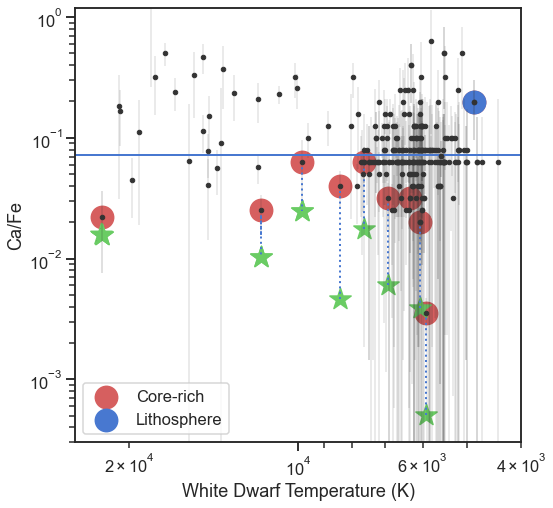

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
    
diff_sigma=ddd['Differentiation sigma significance']

plt.errorbar(teff[include] , 10.**ca_fe[include], yerr=er_ca_fe[include], fmt='.', linewidth=0.2, color='0.2')

fe_solar= 7.5
ca_solar=6.36

plt.plot([1e6,1],[10.**(ca_solar-fe_solar), 10.**(ca_solar-fe_solar)])



samp_c=(core_mass_fraction>0.17)&  (ca_fe!=0) & (er_ca<0.3) & (er_ca>0)
samp_m=(core_mass_fraction<0.17)&  (ca_fe!=0) & (er_ca<0.3) & (er_ca>0)


samp_c= (include) & (core_mass_fraction>0.17)
samp_m= (include) & (core_mass_fraction<0.17)


samp_d=(include) & (diff_sigma>3) & (core_mass_fraction>0.17)
plt.scatter(teff[samp_d], 10.**ca_fe[samp_d], marker='o', label='Core-rich', s=500, color='r')

teff_two=teff[samp_d]
ca_fe_two=ca_fe[samp_d]


#252    WD0449-259 without Na
#260    WD1350-162

# from Andy
#For WD0449: t_Ca = 2801374.6864736145 and t_Fe = 2044545.594471703 (in years)
#For WD1350: t_Ca = 2659997.815679711 and t_Fe = 1969677.8450955648 (in years)


tau_ca_wd0049= 10.**6.637
tau_fe_wd0049= 10.**6.497

tau_ca_wd0049= 2801374.6864736145 
tau_fe_wd0049= 2044545.594471703


tau_ca_wd1350= 10.**6.522
tau_fe_wd1350= 10.**6.391


tau_ca_wd1350= 2659997.815679711
tau_fe_wd1350= 1969677.8450955648 

gamma_wd0049=(tau_fe_wd0049-tau_ca_wd0049)/(tau_ca_wd0049*tau_fe_wd0049)

abund_poll_wd0049=10.**ca_fe_two[1]

t_since_accretion_wd0049=7.13575107616111e6
t_event_wd0049=10.**3.97801177739725

abund_origin_wd0049 = abund_poll_wd0049* (tau_ca_wd0049/tau_fe_wd0049)* np.exp (   gamma_wd0049*(t_since_accretion_wd0049-t_event_wd0049 )) * ((1- np.exp( - t_event_wd0049/tau_ca_wd0049))/(1-np.exp(-t_event_wd0049/tau_fe_wd0049)))


plt.plot([9850,9850], [abund_poll_wd0049,abund_origin_wd0049],linestyle=':', color='b')


# this is now for WD 1350 
t_since_accretion_wd1350=6.84e6
t_event_wd1350=10.**(3.1)

gamma_wd1350=(tau_fe_wd1350-tau_ca_wd1350)/(tau_ca_wd1350*tau_fe_wd1350)

abund_poll_wd1350=10.**ca_fe_two[2]
print('P 1350', abund_poll_wd1350)
abund_origin_wd1350 = abund_poll_wd1350* (tau_ca_wd1350/tau_fe_wd1350)* np.exp (   gamma_wd1350*(t_since_accretion_wd1350-t_event_wd1350 )) * ((1- np.exp( - t_event_wd1350/tau_ca_wd1350))/(1-np.exp(-t_event_wd1350/tau_fe_wd1350)))

print('O 1350', abund_origin_wd1350)

plt.plot([11640,11640], [abund_poll_wd1350,abund_origin_wd1350 ],linestyle=':', color='b')

plt.scatter([9850,11640], [abund_origin_wd0049,abund_origin_wd1350 ],marker='*', s=500, color='g')


########################################################################

abund_poll_wd0843=10.**(-6.26--4.6)
print('P 0843', abund_poll_wd0843)

tau_ca_wd0843=10.**(-0.722)
tau_fe_wd0843=10.**(-0.579)

abund_origin_wd0843 = abund_poll_wd0843* (tau_ca_wd0843/tau_fe_wd0843)

print('O 0843', abund_origin_wd0843)

plt.scatter([ 22412], [ abund_poll_wd0843 ],marker='o', s=500, color='r')
#plt.scatter([ 22412], [ abund_poll_wd0843 ],marker='o', s=500, facecolor='r', hatch=3*'\\')


er_0843=(10.**(-6.26)/10.**(-4.6))*np.log(10)*(0.2**2+0.2**2.)**0.5    
plt.errorbar([22412] , [10.**(-6.26--4.6)], yerr=er_0843, fmt='.', linewidth=0.3, color='0.2')


plt.plot([11640,11640], [abund_poll_wd0843,abund_origin_wd0843 ],linestyle=':', color='b')

####################

plt.scatter([9850,11640, 22412], [abund_origin_wd0049,abund_origin_wd1350, abund_origin_wd0843 ],marker='*', s=500, color='g')
plt.scatter([22412], [ abund_origin_wd0843 ],marker='*', s=500, facecolor='g', hatch=3*'\\')
plt.scatter([22412], [ abund_origin_wd0843 ],marker='*', s=500, facecolor='g')


plt.errorbar(teff_holl, 10.**ca_fe_holl, yerr=er_ca_fe_holl, fmt='.', linewidth=0.2, color='0.2')



diff_sigma_holl=data_hollands['Req_Core']


Req_dec=data_hollands["Crust Rich?"]


plt.scatter(teff_holl[diff_sigma_holl>3], 10.**ca_fe_holl[diff_sigma_holl>3], marker='o',s=500, color='r')
plt.scatter(teff_holl[Req_dec], 10.**ca_fe_holl[Req_dec], marker='o',s=500, color='b', label='Lithosphere')



plt.scatter(teff_holl[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)],abund_origin[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)], marker='*', s=500, color='g')


plt.plot([teff_holl[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)],teff_holl[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)]], 
         [abund_origin[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)],abund_poll[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)]], linestyle=':', color='b')



ax.legend(loc='lower left')


ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('White Dwarf Temperature (K)')
plt.ylabel('Ca/Fe')

ax.set_xlim(25000, 4000)


ax.set_ylim((3e-4,1.2))
plt.savefig("bonsor_fig1.pdf")
plt.show()



In [20]:
## print the table for Fig1 

##Core-rich objects
teff_core=[9850,11640, 22412]
abund_origin_core=[abund_origin_wd0049,abund_origin_wd1350, abund_origin_wd0843 ]
abund_poll_core=[abund_poll_wd0049,abund_poll_wd1350, abund_poll_wd0843 ]


teff_core_holl=teff_holl[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)].values

abund_origin_core_H=abund_origin[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)]. values
abund_poll_core_H=abund_poll[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)].values


print('Teff, Ca_Fe_obs, Ca_Fe_adjusted')

for i in range(0,3):
    print(teff_core[i], ',',  abund_poll_core[i],  ',',abund_origin_core[i])

for i in range(0,5):
    print(teff_core_holl[i],',',  abund_poll_core_H[i], ',', abund_origin_core_H[i] )
    
#This is the data for the core or mantle-rich objects


Teff, Ca_Fe_obs, Ca_Fe_adjusted
9850 , 0.06309573444801943 , 0.02462170969468023
11640 , 0.025118864315095822 , 0.010202670625238797
22412 , 0.02187761623949552 , 0.01573982864466219
6903 , 0.03162277660168379 , 0.0060753438119368775
5920 , 0.003548133892335746 , 0.0005077908481431554
6069 , 0.019952623149688747 , 0.0038851188965024525
7627 , 0.0630957344480193 , 0.017650659570862617
8413 , 0.03981071705534969 , 0.004611172458629937


In [21]:

print(np.size(teff[include].values))
print(np.size(ca_fe[include]))
print(np.size(er_ca_fe[include]))

  
df_print_fig1 = pd.DataFrame({
    "teff": teff[include].values,
    "CaFe": ca_fe[include],
    "sigmaCaFe": np.log(er_ca_fe[include]),
})  

df_print_fig1_sorted=df_print_fig1.sort_values(by=['teff'])



print(df_print_fig1_sorted.to_latex(index=False, float_format="{:0.2f}".format  ))  


df_print_fig1_two = pd.DataFrame({
    "teff": teff_holl,
    "CaFe": ca_fe_holl,
    "sigmaCaFe": np.log(er_ca_fe_holl),
})


df_print_fig1_merge=pd.concat([df_print_fig1, df_print_fig1_two])


df_print_fig1_two_sorted=df_print_fig1_merge.sort_values(by=['teff'])

print(df_print_fig1_two_sorted.to_latex(index=False, float_format="{:0.2f}".format  ))  



##Remove by hand the duplicate objects from the sorted table 





50
50
50
\begin{tabular}{rrr}
\toprule
  teff &  CaFe &  sigmaCaFe \\
\midrule
  4861 & -0.70 &      -2.28 \\
  5010 & -1.20 &      -2.79 \\
  5497 & -0.30 &      -1.12 \\
  5500 & -1.20 &      -2.37 \\
  5560 & -1.15 &      -3.77 \\
  5592 & -1.40 &      -3.25 \\
  5631 & -1.40 &      -3.41 \\
  5950 & -1.10 &      -3.65 \\
  5974 & -1.50 &      -3.88 \\
  6014 & -1.60 &      -4.11 \\
  6023 & -0.90 &      -2.50 \\
  6069 & -1.70 &      -5.04 \\
  6105 & -1.10 &      -2.56 \\
  6172 & -1.00 &      -3.42 \\
  6203 & -0.90 &      -2.74 \\
  6245 & -1.20 &      -3.89 \\
  6321 & -1.50 &      -3.88 \\
  6344 & -1.20 &      -3.89 \\
  7010 & -0.80 &      -2.96 \\
  7263 & -1.00 &      -2.73 \\
  7627 & -1.20 &      -3.89 \\
  9600 & -1.00 &      -3.42 \\
  9850 & -1.20 &      -3.43 \\
 10057 & -0.59 &      -2.48 \\
 10120 & -0.50 &      -2.27 \\
 10800 & -0.64 &      -3.21 \\
 11640 & -1.60 &      -4.81 \\
 11787 & -1.24 &      -4.13 \\
 11800 & -0.68 &      -2.59 \\
 13000 & -0.63 &      

No handles with labels found to put in legend.


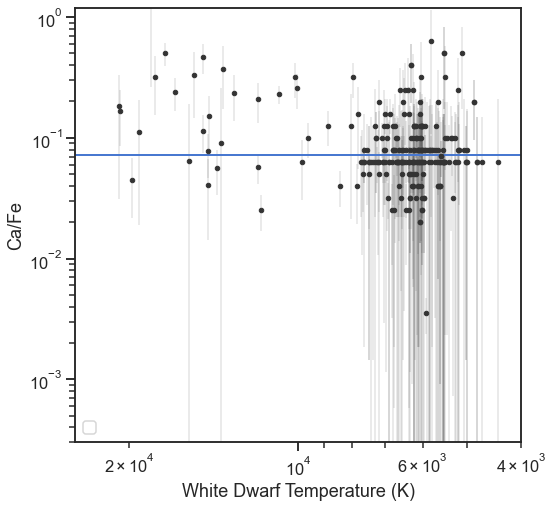

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
    
diff_sigma=ddd['Differentiation sigma significance']

plt.errorbar(teff[include] , 10.**ca_fe[include], yerr=er_ca_fe[include], fmt='.', linewidth=0.2, color='0.2')

fe_solar= 7.5
ca_solar=6.36

plt.plot([1e6,1],[10.**(ca_solar-fe_solar), 10.**(ca_solar-fe_solar)])

samp_d=(include) & (diff_sigma>3)

plt.errorbar(teff_holl, 10.**ca_fe_holl, yerr=er_ca_fe_holl, fmt='.', linewidth=0.2, color='0.2')


ax.legend(loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('White Dwarf Temperature (K)')
plt.ylabel('Ca/Fe')
ax.set_xlim(25000, 4000)
ax.set_ylim((3e-4,1.2))
plt.savefig("plot_teff_ca_fe_core_mantle_include_dec_dataonly.pdf")

plt.show()




P 0049 0.06309573444801943
7126244.770431677
Ori 049 0.02462170969468023
P 1350 0.025118864315095822
O 1350 0.010202670625238797
P 0843 0.02187761623949552
O 0843 0.01573982864466219


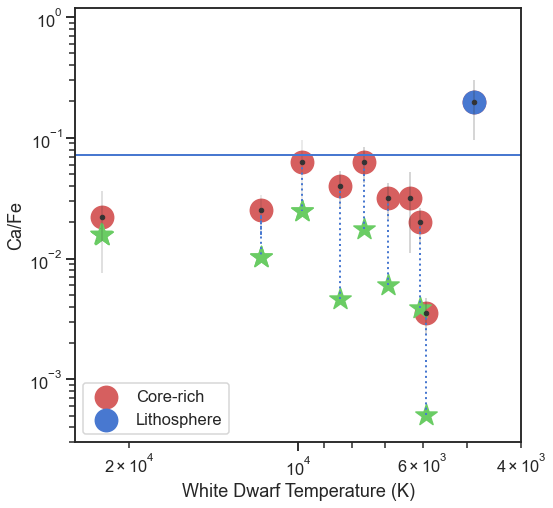

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
    
diff_sigma=ddd['Differentiation sigma significance']

fe_solar= 7.5
ca_solar=6.36

plt.plot([1e6,1],[10.**(ca_solar-fe_solar), 10.**(ca_solar-fe_solar)])


samp_c= (include) & (core_mass_fraction>0.17)
samp_m= (include) & (core_mass_fraction<0.17)


samp_d=(include) & (diff_sigma>3) & (core_mass_fraction>0.17)
plt.scatter(teff[samp_d], 10.**ca_fe[samp_d], marker='o', label='Core-rich', s=500, color='r')
plt.errorbar(teff[samp_d] , 10.**ca_fe[samp_d], yerr=er_ca_fe[samp_d], fmt='.', linewidth=0.2, color='0.2')

teff_two=teff[samp_d]
ca_fe_two=ca_fe[samp_d]


#252    WD0449-259 without Na
#260    WD1350-162

# from Andy
#For WD0449: t_Ca = 2801374.6864736145 and t_Fe = 2044545.594471703 (in years)
#For WD1350: t_Ca = 2659997.815679711 and t_Fe = 1969677.8450955648 (in years)


tau_ca_wd0049= 10.**6.637
tau_fe_wd0049= 10.**6.497

tau_ca_wd0049= 2801374.6864736145 
tau_fe_wd0049= 2044545.594471703


tau_ca_wd1350= 10.**6.522
tau_fe_wd1350= 10.**6.391


tau_ca_wd1350= 2659997.815679711
tau_fe_wd1350= 1969677.8450955648 



gamma_wd0049=(tau_fe_wd0049-tau_ca_wd0049)/(tau_ca_wd0049*tau_fe_wd0049)

abund_poll_wd0049=10.**ca_fe_two[1]
print('P 0049', abund_poll_wd0049)



t_since_accretion_wd0049=7.13575107616111e6
t_event_wd0049=10.**3.97801177739725
print(t_since_accretion_wd0049-t_event_wd0049)

abund_origin_wd0049 = abund_poll_wd0049* (tau_ca_wd0049/tau_fe_wd0049)* np.exp (   gamma_wd0049*(t_since_accretion_wd0049-t_event_wd0049 )) * ((1- np.exp( - t_event_wd0049/tau_ca_wd0049))/(1-np.exp(-t_event_wd0049/tau_fe_wd0049)))


print('Ori 049', abund_origin_wd0049)

plt.plot([9850,9850], [abund_poll_wd0049,abund_origin_wd0049],linestyle=':', color='b')

# this is now for WD 1350 (ignore the variables being the same as above...)

t_since_accretion_wd1350=6.84e6
t_event_wd1350=10.**(3.1)

gamma_wd1350=(tau_fe_wd1350-tau_ca_wd1350)/(tau_ca_wd1350*tau_fe_wd1350)


abund_poll_wd1350=10.**ca_fe_two[2]
print('P 1350', abund_poll_wd1350)


abund_origin_wd1350 = abund_poll_wd1350* (tau_ca_wd1350/tau_fe_wd1350)* np.exp (   gamma_wd1350*(t_since_accretion_wd1350-t_event_wd1350 )) * ((1- np.exp( - t_event_wd1350/tau_ca_wd1350))/(1-np.exp(-t_event_wd1350/tau_fe_wd1350)))


print('O 1350', abund_origin_wd1350)

plt.plot([11640,11640], [abund_poll_wd1350,abund_origin_wd1350 ],linestyle=':', color='b')



plt.scatter([9850,11640], [abund_origin_wd0049,abund_origin_wd1350 ],marker='*', s=500, color='g')



abund_poll_wd0843=10.**(-6.26--4.6)
print('P 0843', abund_poll_wd0843)

tau_ca_wd0843=10.**(-0.722)
tau_fe_wd0843=10.**(-0.579)

abund_origin_wd0843 = abund_poll_wd0843* (tau_ca_wd0843/tau_fe_wd0843)

print('O 0843', abund_origin_wd0843)

plt.scatter([ 22412], [ abund_poll_wd0843 ],marker='o', s=500, color='r')




plt.plot([11640,11640], [abund_poll_wd0843,abund_origin_wd0843 ],linestyle=':', color='b')



plt.scatter([9850,11640, 22412], [abund_origin_wd0049,abund_origin_wd1350, abund_origin_wd0843 ],marker='*', s=500, color='g')
plt.scatter([22412], [ abund_origin_wd0843 ],marker='*', s=500, facecolor='g', hatch=3*'\\')
plt.scatter([22412], [ abund_origin_wd0843 ],marker='*', s=500, facecolor='g')


er_0843=(10.**(-6.26)/10.**(-4.6))*np.log(10)*(0.2**2+0.2**2.)**0.5    
plt.errorbar([22412] , [10.**(-6.26--4.6)], yerr=er_0843, fmt='.', linewidth=0.3, color='0.2')



samp_d=(include) & (diff_sigma>3)
diff_sigma_holl=data_hollands['Req_Core']

Req_dec=data_hollands["Crust Rich?"]


plt.scatter(teff_holl[diff_sigma_holl>3], 10.**ca_fe_holl[diff_sigma_holl>3], marker='o',s=500, color='r')
plt.errorbar(teff_holl[diff_sigma_holl>3], 10.**ca_fe_holl[diff_sigma_holl>3], yerr=er_ca_fe_holl[diff_sigma_holl>3], fmt='.', linewidth=0.4, color='0.2')


plt.scatter(teff_holl[Req_dec], 10.**ca_fe_holl[Req_dec], marker='o',s=500, color='b', label='Lithosphere')



plt.scatter(teff_holl[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)],abund_origin[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)], marker='*', s=500, color='g')


plt.plot([teff_holl[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)],teff_holl[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)]], 
         [abund_origin[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)],abund_poll[(req_core>3)&(core_mass_fraction_holl>0.17) & (req_dec>3.)]], linestyle=':', color='b')



ax.legend(loc='lower left')


ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('White Dwarf Temperature (K)')
plt.ylabel('Ca/Fe')

ax.set_xlim(25000, 4000)


ax.set_ylim((3e-4,1.2))
plt.savefig("plot_teff_ca_fe_core_mantle_include_dec_ONLYCORE.pdf")



plt.show()


